# Assignment nº2
### Implementation and Analysis of Decision Tree Induction for Supervised Machine Learning
#### Work assembled by Alejandro Gonçalves, Francisca Mihalache and Pedro Fernandes

### Table of contents <a name="contents"></a>

1. [Introduction](#introduction)
2. [Datasets](#datasets)
   - 2.1. [Restaurant](#restaurant)
   - 2.2. [Weather](#weather)
   - 2.3. [Iris](#iris)
   - 2.4. [Connect4](#connect4)
3. [ID3](#id3)
   - 3.1. [Entropy](#entropy)
  
      - 3.1.1.[Restaurant](#res)
          - 3.1.1.1. [Entropy for each Attribute](#entropy-each)
          - 3.1.1.2. [Average Information](#avg-info)
          - 3.1.1.3. [Information Gain](#info-gain)
      - 3.1.2.[Weather](#wea)
      - 3.1.3.[Iris](#ir)
      - 3.1.4.[Connect4](#c4)
4. [Decision Tree's Implementation](#dt-implementation)
5. [ID3 Implementation](#id3-implementation)
6. [Results/Predictions??](#results)
7. [Conclusions](#conclusions)

## Introduction <a name="introduction"></a>
The goal is to implement the ID3 algorithm to learn decision trees from data, ensuring the program can both build the tree and classify new instances across different datasets, without using automatic libraries. The focus is on mastering the theoretical concepts and practically applying them to solve classification tasks effectively.

### Imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Datasets <a name="datasets"></a>
[[go back to the top]](#contents)

In this section, we will dive into the details of our datasets, exploring the nature of the data, the predictive outcomes they are associated with, and their respective roles in our analysis.

### Restaurant <a name="restaurant"></a>
[[go back to the topic]](#datasets)

The 'restaurant' dataset records dining experiences across various establishments. Each entry is characterized by a unique identifier (ID) and attributes such as the availability of alternative dining (Alt), presence of a bar (Bar), whether it is a Friday (Fri), customer's hunger level (Hun), patron density (Pat), price range (Price), rainy weather condition (Rain), reservation availability (Res), type of cuisine (Type), and estimated waiting time (Est). The target variable (Class) indicates whether a customer will decide to wait for a table ('Yes') or not ('No'). By analyzing these factors, our objective is to predict customer waiting decisions and gain insights into the influential factors that affect these decisions in the restaurant industry

### Data Cleanup


In [52]:
df1 = pd.read_csv('restaurant.csv')
df1.head()

,ID,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,X1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,X2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,X3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,X4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,X5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


#### Missing Values
Checking if there's any missing values

In [53]:
print(df1.isnull().sum())

ID       0
Alt      0
Bar      0
Fri      0
Hun      0
Pat      2
Price    0
Rain     0
Res      0
Type     0
Est      0
Class    0
dtype: int64


#### Mapping Booleans to Integers

In [54]:
df1['Alt'] = df1['Alt'].replace({'No': 0, 'Yes': 1})
df1['Bar'] = df1['Bar'].replace({'No': 0, 'Yes': 1})
df1['Fri'] = df1['Fri'].replace({'No': 0, 'Yes': 1})
df1['Hun'] = df1['Hun'].replace({'No': 0, 'Yes': 1})
df1['Rain'] = df1['Rain'].replace({'No': 0, 'Yes': 1})
df1['Res'] = df1['Res'].replace({'No': 0, 'Yes': 1})
df1['Class'] = df1['Class'].replace({'No': 0, 'Yes': 1})
df1['Price'] = df1['Price'].replace({'$':0, '$$':1,'$$$':2})
#df1['Pat'] = df1['Pat'].replace({'None':0, 'Some':1, 'Full':2})
df1['Type'] = df1['Type'].replace({'French':0, 'Thai':1,'Burger':2,'Italian':3})
est_mapping = {'0-10': 0, '10-30': 1, '30-60': 2, '>60': 3}
df1['Est'] = df1['Est'].replace(est_mapping)
# Função para mapear 'Pat' para inteiros
def map_pat_to_int(value):
    mapping = {'None': 0, 'Some': 1, 'Full': 2}
    # Use o método get() para lidar com valores que não estão no mapeamento
    return mapping.get(value, -1)  # Retorna -1 para qualquer valor não reconhecido

# Aplica a função à coluna 'Pat'
df1['Pat'] = df1['Pat'].apply(map_pat_to_int)
df1 = df1.drop('ID', axis=1)
df1.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,1,0,0,1,1,2,0,1,0,0,1
1,1,0,0,1,2,0,0,0,1,2,0
2,0,1,0,0,1,0,0,0,2,0,1
3,1,0,1,1,2,0,0,0,1,1,1
4,1,0,1,0,2,2,0,1,0,3,0


#### Creating a **scatterplot matrix**

C:\Users\aleja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


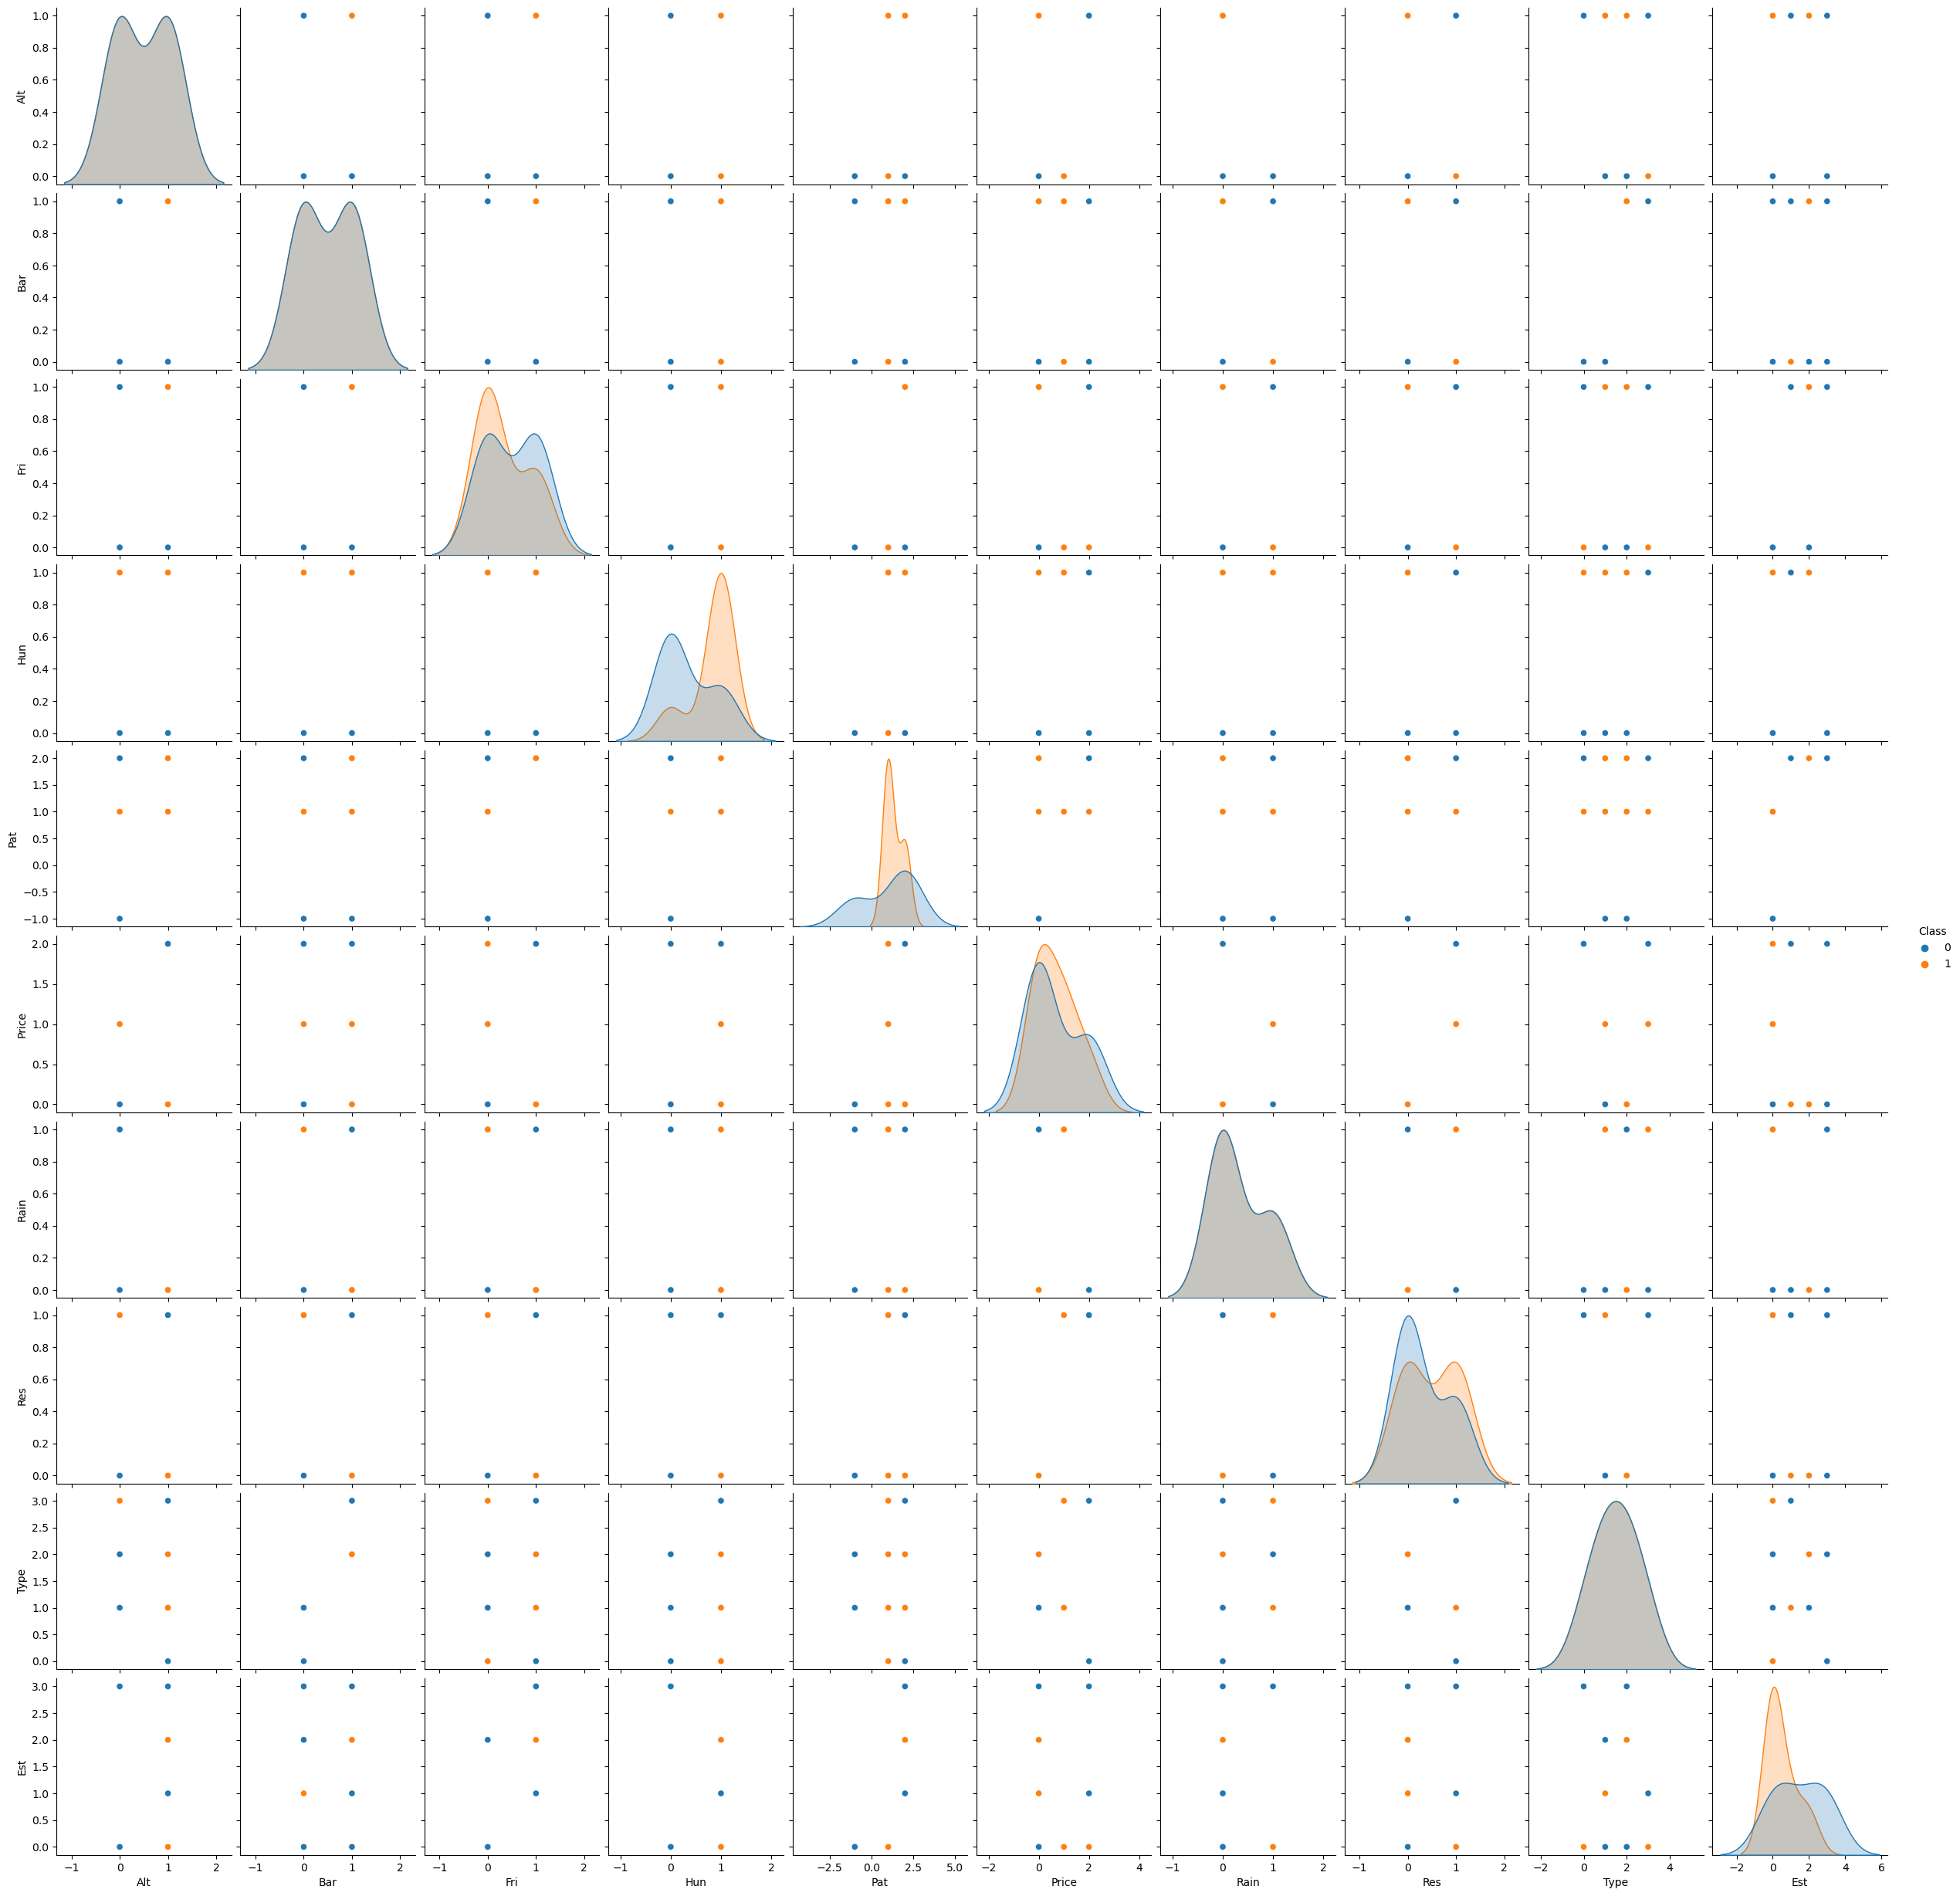

In [55]:
sb.pairplot(df1.dropna(), hue='Class')


### Weather <a name="weather"></a>
[[go back to the topic]](#datasets)

The 'weather' dataset encompasses a range of meteorological conditions and their impact on the decision to engage in an outdoor activity, specifically playing a sport. The dataset contains records identified by an ID, along with attributes including Weather conditions (sunny, overcast, rainy), Temperature (Temp), Humidity levels, Wind presence (Windy), and the decision to Play or not. The objective with this dataset is to discern patterns and deduce the optimal weather conditions that favor the decision to play, enhancing our understanding of how weather variables influence outdoor recreational activities.

### Data Cleanup

In [56]:
df2 = pd.read_csv('weather.csv')
df2.head()

,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes


#### Missing values
Checking if there's any missing values

In [57]:
print(df2.isnull().sum())

ID          0
Weather     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64


#### Mapping Booleans to Integers

In [58]:
df2['Windy'] = df2['Windy'].replace({False: 0, True: 1})
df2['Weather'] = df2['Weather'].replace({'sunny':0, 'overcast':1,'rainy':2})
df2['Play'] = df2['Play'].replace({'no':0, 'yes':1})
df2 = df2.drop('ID', axis=1)
df2.head()

,Weather,Temp,Humidity,Windy,Play
0,0,85,85,0,0
1,0,80,90,1,0
2,1,83,86,0,1
3,2,70,96,0,1
4,2,68,80,0,1


#### Creating a **scatterplot matrix**

C:\Users\aleja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


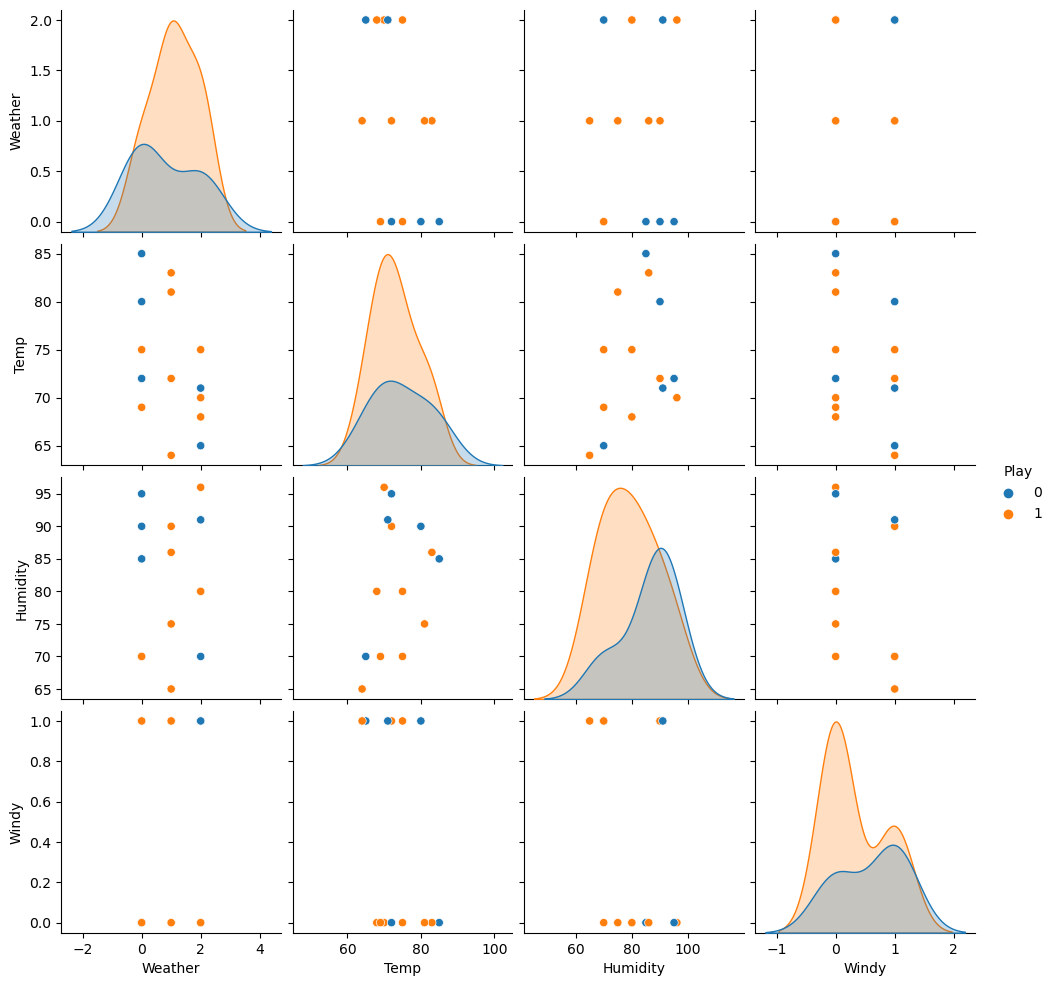

In [59]:
sb.pairplot(df2.dropna(), hue='Play')


### Iris <a name="iris"></a>
[[go back to the topic]](#datasets)

The 'iris' dataset, which is renowned for its role in pattern recognition literature, records the morphological measurements of iris flowers, including sepal length, sepal width, petal length, and petal width. Each entry, marked by an ID, captures these features and classifies the iris into one of three species: Iris-setosa, Iris-versicolor, or Iris-virginica. The task at hand is to employ these attributes to accurately predict the class of iris, showcasing the intricate relationship between the flower's physical characteristics and its species.

In [60]:
df3 = pd.read_csv('iris.csv')
df3.head()

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Missing Values
Checking if there's any missing values

In [61]:
print(df3.isnull().sum())

ID             0
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


In [62]:
df3 = df3.drop('ID', axis=1)
df3.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Creating a **scatterplot matrix**

C:\Users\aleja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


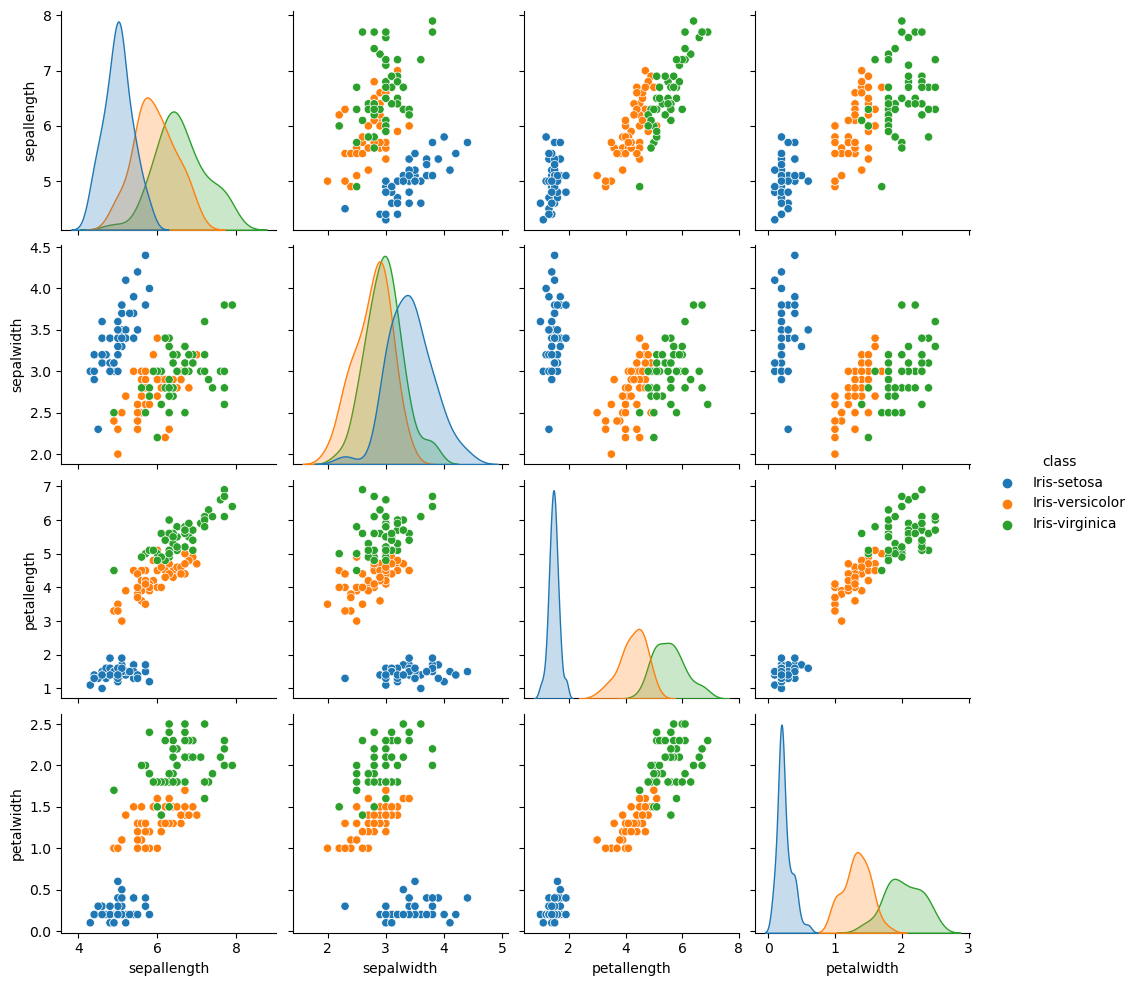

In [63]:
sb.pairplot(df3.dropna(), hue='class')


### Connect4 <a name="connect4"></a>
[[go back to the topic]](#datasets)

The 'connect4' dataset consists of multiple instances representing game states of the Connect Four game. The dataset captures various board configurations, each with a set of features describing the occupancy of each cell by a 'red' or 'yellow' disc, or indicating an empty cell. The objective is to use these configurations to predict the outcome of the game—whether it ends in a win for the first player, a win for the second player, or a draw. 

Não percebi muito bem este csv tbh, pedi ao chat

In [64]:
df4 = pd.read_csv('connect4.csv')
df4.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


#### Missing Values
Checking if there's any missing values

In [65]:
print(df4.isnull().sum())

b       0
b.1     0
b.2     0
b.3     0
b.4     0
b.5     0
b.6     0
b.7     0
b.8     0
b.9     0
b.10    0
b.11    0
x       0
o       0
b.12    0
b.13    0
b.14    0
b.15    0
x.1     0
o.1     0
x.2     0
o.2     0
x.3     0
o.3     0
b.16    0
b.17    0
b.18    0
b.19    0
b.20    0
b.21    0
b.22    0
b.23    0
b.24    0
b.25    0
b.26    0
b.27    0
b.28    0
b.29    0
b.30    0
b.31    0
b.32    0
b.33    0
win     0
dtype: int64


# ID3 <a name="id3"></a>
[[go back to the top]](#contents)


The ID3 decision tree algorithm strategically employs Information Gain to identify optimal points for splitting the data during the tree-building process. This selection is crucial as it influences the algorithm's ability to accurately classify data. To quantify Information Gain, the concept of Entropy is of crucial importance. By calculating Entropy, we can evaluate the effectiveness of each potential split in reducing uncertainty, guiding the decision tree to more effective and informed splits that enhance classification performance.

### Outline of ID3 Algorithm for Decision Tree Construction:

#### Initial Entropy Calculation:
- **Definition of Entropy:** Measures the amount of uncertainity in dataset.
- **Entropy Calculation Formula:**
$$
Entropy(S) = -\frac{p}{p+n} \log_2 \left(\frac{p}{p+n}\right) - \frac{n}{p+n} \log_2 \left(\frac{n}{p+n}\right)
$$

#### Attribute Evaluation:
- **Entropy for Attributes:** Assess the entropy for each individual attribute across all possible values.
- **Average Entropy Computation:** Aggregate the entropies to find the mean entropy across all attributes.
  - **Average Entropy Formula:**
  $$
  I(Attribute) = \sum \left(\frac{pi + ni}{p + n}\right) Entropy(A)
  $$

#### Information Gain Assessment:
- **Information Gain Calculation:** Determine the gain in information by computing the change in entropy before and after partitioning the dataset based on an attribute.
  - **Information Gain Formula:**
  $$
  Gain = Entropy(S) - I(Attribute)
  $$

#### Attribute Selection:
- **Optimal Attribute Choice:** Select the attribute with the maximal information gain for splitting.

#### Iterative Process:
- **Repetition Until Completion:** Continue the process iteratively to construct the desired decision tree structure.


### Entropy <a name="entropy"></a>
[[go back to the topic]](#id3)



#### Calculating the Entropy for the entire dataset

In order to do this, here's an implementation of a function which calculates the entropy given the positive(p) and negative(n) values.

In [66]:
def entropy(p, n):
    total = p + n
    if p == 0 or n == 0:  # Avoid log(0) which is undefined
        return 0
    entropy_value = -(p / total) * math.log2(p / total) - (n / total) * math.log2(n / total)
    return entropy_value

#### Restaurant <a name="res"></a>

In this specific case, we have 6 occurrences of 'Yes' and 6 occurrences of 'No'. These values are represented numerically as '1' for 'Yes' and '0' for 'No'. For the purposes of our calculations, 'Yes' is considered the positive value (p), corresponding to the number of positive instances, and 'No' is considered the negative value (n), representing the number of negative instances.
So to calculate the entropy, we define 'p' as 6 and 'n' as 6


In [88]:
p = 6  
n = 6   
print(f"Entropy: {entropy(p, n):.3f}")
#print("Entropy:", entropy(p, n))

Entropy: 1.0


#### Calculating Entropy for each Attribute of the Dataset <a name="entropy-each"></a>
[[go back to the topic]](#entropy)



#### **Alt** Attribute
Let's begin by examining the attribute Alt. In our dataset, we have a total of 6 occurrences where Alt is marked as 'Yes' and 6 occurrences where Alt is marked as 'No'. Now, if we focus on the subset where Alt='Yes', we find that within this group, there are 3 instances of 'Yes' and 3 instances of 'No'. Similarly, within the subset where Alt='No', we also find 3 occurrences of 'Yes' and 3 occurrences of 'No'. With this information in mind, we proceed to perform the necessary calculations.
We can also verify this, with the table presented below.

| Alt   | Class | 
|-------|-------|
| **Yes**| Yes✅ | 
| **Yes**| No❌  | 
| **No** | Yes✅ | 
| **Yes**| Yes✅ |
| **Yes**| No❌  | 
| **No** | Yes✅ | 
| **No** | No❌  | 
| **No** | Yes✅ |
| **No** | No❌  | 
| **Yes**| No❌  | 
| **No** | No❌  |     
| **Yes**| Yes✅ | 

So for **Alt**='Yes' we have:

In [79]:
p=3
n=3
print(f"Entropy for Alt='Yes': {entropy(p, n):.3f}")
#print("Entropy for Alt='No':", entropy(p, n))

Entropy for Alt='Yes': 1.000


And for **Alt**='No':

In [87]:
p=3
n=3
print(f"Entropy for Alt='No': {entropy(p, n):.3f}")
#print("Entropy for Alt='No':", entropy(p, n))

Entropy for Alt='No': 1.0


As expected, since we have the same number of occurrences of each result.

#### Calculating Average Information Entropy(**Alt**='Value') <a name="avg-info"></a>
[[go back to the topic]](#res)

Let's make this table in order to help us to perfome the next calculations.
|    Alt   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Yes**    |**3**    | **3**  | **1** |
| **No**    |**3**    | **3**  | **1** |


Next, our task is to develop a function aimed at computing the information content pertinent to the attributes we're interested in and the specific target variable.

In [70]:
def average_information(data, attribute, target):
    weighted_sum = 0
    total = len(data)
    for value in data[attribute].unique(): #iterates over each unique value found in a specified column of a DataFrame
        subdata = data[data[attribute] == value]
        sub_p = (subdata[target] == 1).sum()
        sub_n = (subdata[target] == 0).sum()
        sub_entropy = entropy(sub_p, sub_n)
        weight = (sub_p + sub_n) / total
        weighted_sum += weight * sub_entropy
    return weighted_sum

In [86]:
average_info_for_alt = average_information(df1, 'Alt', 'Class')
print(f"Average Information for Alt: {average_info_for_alt:.3f}")
#print("Average Information for Alt:", average_info_for_alt)

Average Information for Alt: 1.0


#### Calculating the Information Gain for **Alt** <a name="info-gain"></a>
[[go back to the topic]](#res)

To conclude, we compute the information gain associated with this attribute.

In [72]:
def information_gain(data, attribute, target):
    total_p = (data[target] == 1).sum()
    total_n = (data[target] == 0).sum()
    total_entropy = entropy(total_p, total_n)
    avg_info = average_information(data, attribute, target)
    return total_entropy - avg_info

In [85]:
info_gain_alt = information_gain(df1,'Alt','Class')
print(f"Information Gain for Alt: {gain:.3f}")
#print("Information Gain for Alt:", info_gain_alt)

Information Gain for 'Alt': 0.0


#### **Bar** Attribute
[[go back to the topic]](#res)

Following the attribute Alt, let's explore Bar. In this case, there are 6 occurrences of both 'Yes' and 'No'. Within the subset where Bar is 'Yes', there are 3 occurrences each of 'Yes' and 'No', and the same distribution holds for Bar='No'. So the results will be the same as the Alt attribute. Let's organize this information in the table below.
| Bar   | Class | 
|-------|-------|
| **No**| Yes✅ | 
| **No**| No❌  | 
| **Yes** | Yes✅ | 
| **No**| Yes✅ |
| **No**| No❌  | 
| **Yes** | Yes✅ | 
| **Yes** | No❌  | 
| **No** | Yes✅ |
| **Yes** | No❌  | 
| **Yes**| No❌  | 
| **No** | No❌  |     
| **Yes**| Yes✅ | 


|    Bar   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Yes**    |**3**    | **3**  | **1** |
| **No**    |**3**    | **3**  | **1** |

| Avg Info | Info Gain |
|:---------|:-------:|
| **1**    | **0**  | 

#### **Fri** Atrribute
[[go back to the topic]](#res)

Now, shifting focus to the attribute Bar, we delve into Fri. Here, Fri exhibits 5 occurrences of 'Yes' and 7 of 'No'.

| Fri   | Class | 
|-------|-------|
| **No**| Yes✅ | 
| **No**| No❌  | 
| **No** | Yes✅ | 
| **Yes**| Yes✅ |
| **Yes**| No❌  | 
| **No** | Yes✅ | 
| **No** | No❌  | 
| **No** | Yes✅ |
| **Yes** | No❌  | 
| **Yes**| No❌  | 
| **No** | No❌  |     
| **Yes**| Yes✅ | 


For **Fri**='Yes', we have

In [75]:
p=2
n=3
print(f"Entropy for Fri='Yes': {entropy(p, n):.3f}")
#print("Entropy for Fri='Yes':", entropy(p, n))

Entropy for Fri='Yes': 0.971


And for **Fri**='No':

In [83]:
p=4
n=3
print(f"Entropy for Fri='No': {entropy(p, n):.3f}")
#print("Entropy for Fri='No':", entropy(p, n))

Entropy for Fri='No': 0.985


#### Calculating Average Information Entropy(**Fri**='Value')
[[go back to the topic]](#res)

Let's create a table to facilitate the forthcoming calculations.

|    Fri   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Yes**    |**2**    | **3**  | **0.971** |
| **No**    |**4**    | **3**  | **0.985** |

Following this, we'll proceed to compute the information content for the attributes of interest and the designated target variable with the function provided above.

In [89]:
average_info_for_fri = average_information(df1, 'Fri', 'Class')
print(f"Average Information for Fri: {average_info_for_fri:.3f}")

Average Information for Fri: 0.979


#### Calculating the Information Gain for **Fri**
[[go back to the topic]](#res)

In [91]:
info_gain_fri = information_gain(df1,'Fri','Class')
print(f"Information Gain for Fri: {info_gain_fri:.3f}")

Information Gain for Fri: 0.021


#### **Hun** Attribute
[[go back to the topic]](#res)

After examining the attribute Fri, let's now investigate Hun. Here, we find 7 occurrences of 'Yes' and 5 occurrences of 'No'. Within the subset where Hun is 'Yes', there are 5 occurrences of 'Yes' and 2 of 'No', and for Hun='No', we have 1 instance of 'Yes' and 4 of 'No'. Consequently, the results mirror those of the Hun attribute. Let's arrange this data in the table below.

| Hun   | Class | 
|-------|-------|
| **Yes**| Yes✅ | 
| **Yes**| No❌  | 
| **No** | Yes✅ | 
| **Yes**| Yes✅ |
| **No**| No❌  | 
| **Yes** | Yes✅ | 
| **No** | No❌  | 
| **Yes** | Yes✅ |
| **No** | No❌  | 
| **Yes**| No❌  | 
| **No** | No❌  |     
| **Yes**| Yes✅ | 


For **Hun**='Yes':

In [92]:
p=5
n=2
print(f"Entropy for Hun='Yes': {entropy(p, n):.3f}")

Entropy for Fri='Yes': 0.863


For **Hun**='No':

In [94]:
p=1
n=4
print(f"Entropy for Hun='No': {entropy(p, n):.3f}")

Entropy for Fri='No': 0.722


#### Calculating Average Information Entropy(**Hun**='Value')
[[go back to the topic]](#res)

Let's establish a table to streamline the subsequent calculations.

|    Hun   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Yes**    |**5**    | **2**  | **0.863** |
| **No**    |**1**    | **4**  | **0.722** |

Afterward, we'll move on to computing the information content for the attributes of interest and the specified target variable using the provided function.

In [95]:
average_info_for_hun = average_information(df1, 'Hun', 'Class')
print(f"Average Information for Hun: {average_info_for_hun:.3f}")

Average Information for Hun: 0.804


#### Calculating the Information Gain for **Hun**
[[go back to the topic]](#res)

In [96]:
info_gain_hun = information_gain(df1,'Hun','Class')
print(f"Information Gain for Hun: {info_gain_hun:.3f}")

Information Gain for Hun: 0.196


#### **Pat** Attribute
[[go back to the topic]](#res)

Here it's a bit different. This time we don't have just 2 possible results for this attribute, we have 3. Here's the table to observe better the information.

| Pat   | Class | 
|-------|-------|
| **Some**| Yes✅ | 
| **Full**| No❌  | 
| **Some** | Yes✅ | 
| **Full**| Yes✅ |
| **Full**| No❌  | 
| **Some** | Yes✅ | 
| **None** | No❌  | 
| **Some** | Yes✅ |
| **Full** | No❌  | 
| **Full**| No❌  | 
| **None** | No❌  |     
| **Full**| Yes✅ | 

As we can see, we have 4 instances of 'Some', 6 of 'Full' and 2 of 'None'. Within the subset 'Some' all occurences are 'Yes', for the 'Full' subset 'Yes' occurs 2 times and 'No' 4 times, and to conclude with the 'None' subset both of them occurences are 'No'.

For **Pat**='Some':

In [97]:
p=4
n=0
print(f"Entropy for Pat='Some': {entropy(p, n):.3f}")

Entropy for Pat='Some': 0.000


For **Pat**='Full':

In [98]:
p=2
n=4
print(f"Entropy for Pat='Full': {entropy(p, n):.3f}")

Entropy for Pat='Full': 0.918


For **Pat**='None':

In [100]:
p=0
n=2
print(f"Entropy for Pat='None': {entropy(p, n):.3f}")

Entropy for Pat='None': 0.000


#### Calculating Average Information Entropy(**Pat**='Value')
[[go back to the topic]](#res)

Let's set up a table to simplify the upcoming calculations.

|    Pat   | Yes = $p$ | No = $n$ | Entropy |
|:------------ |:-------:|:------:|:-------:|
| **Some**    |**4**    | **0**  | **0.000** |
| **Full**    |**2**    | **4**  | **0.918** |
| **None**    |**0**    | **2**  | **0.000** |

In [101]:
average_info_for_pat = average_information(df1, 'Pat', 'Class')
print(f"Average Information for Pat: {average_info_for_pat:.3f}")

Average Information for Pat: 0.459


#### Calculating the Information Gain for **Pat**
[[go back to the topic]](#res)

In [102]:
info_gain_pat = information_gain(df1,'Pat','Class')
print(f"Information Gain for Pat: {info_gain_pat:.3f}")

Information Gain for Pat: 0.541
